In [1]:
import pandas as pd 
import numpy as np 
import os 

os.chdir(r'C:\Users\Familia\Documents\Machine learning')
base = pd.read_excel('ccd.xls',header=1)

In [2]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
# somando linha a linha
base['BILL_TOTAL'] = base.iloc[:,12:18].sum(axis=1)

In [45]:
x = base.iloc[:,[1,3,4,5,25]].values


In [46]:
from sklearn.preprocessing import StandardScaler

sc_base = StandardScaler()
x_cart = sc_base.fit_transform(x)


In [47]:
from sklearn.cluster import KMeans
# metodo elbow 
# onde ele comecar a ter menos variacao sera o numero de clusters
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_cartao = KMeans(n_clusters=i,init='k-means++', random_state=0)
  kmeans_cartao.fit(x_cart)
  wcss.append(kmeans_cartao.inertia_)

In [48]:
wcss

[149999.99999999988,
 113679.10564448612,
 93823.86058344983,
 80262.2503150933,
 71583.61041562118,
 64387.84711517328,
 59110.480379019486,
 54553.45705810042,
 51288.358751451415,
 47817.090322674136]

In [49]:
import plotly.express as plk 

plk.line(x=range(1,11),y=wcss,markers=True)


In [50]:
# ecolho o numero de cluster apartir do ponto com menor queda pois essa variacao nao seria tao drastica
# quando chegamos em um cotovelo voce nao tem um ganho de informacao, aumenta a variacao e diminui a perda
# aumenta numero de cluster, e diminui a varicao de cada grupo em si  
km2 = KMeans(n_clusters=6,init='k-means++')
km2.fit(x_cart)


KMeans(n_clusters=6)

In [51]:
# centroides
km2.cluster_centers_

array([[ 1.47394139, -0.53975465, -0.63815843,  0.54881782, -0.36850071],
       [-0.0690272 , -1.06948579,  0.87332743, -0.61004494, -0.26877514],
       [-0.4641884 ,  1.10793557, -0.66601372,  1.43350945, -0.16166451],
       [ 1.12683689, -0.16235185, -0.08281811,  0.17861197,  2.65886194],
       [-0.50262287,  0.48674821,  0.92364911, -0.61617219, -0.19148126],
       [-0.43008304,  0.07326826, -1.06893762, -0.11215081, -0.18679825]])

In [52]:
km2.labels_

array([5, 4, 4, ..., 4, 2, 2])

In [53]:
km2.predict([[-0.42072534,  0.05921544, 1, -0.10279492,1]])

array([4])

#### nao e possivel plotar, somente usando pca 

In [54]:
x2 = x_cart[:,4].reshape(-1,1)
rotulos = km2.fit_predict(x2)
rotulos

array([4, 4, 4, ..., 4, 1, 1])

In [55]:
r = rotulos.reshape(-1,1)

#### Pca

In [61]:
from sklearn.decomposition import PCA   

pca = PCA(n_components=2)
df2 = pca.fit_transform(x_cart)
df2

array([[-0.68636048, -1.14798291],
       [-1.43188404, -0.30903847],
       [-0.90262988, -0.49465725],
       ...,
       [-0.87805824, -0.88092842],
       [ 1.10158908, -1.53427205],
       [ 1.05818939, -1.12591183]])

In [64]:
pca.explained_variance_

array([1.55939974, 1.35153095])

In [66]:
km3 = KMeans(n_clusters=4)
km3.fit(df2)

KMeans(n_clusters=4)

In [72]:
rot = km3.labels_
cent = km3.cluster_centers_

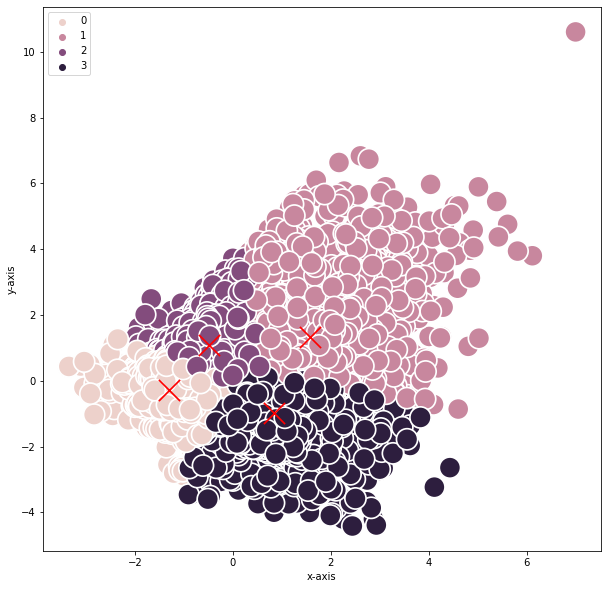

In [73]:
import matplotlib.pyplot as plt
import seaborn as sn 
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(10);
ax=sn.scatterplot(x=df2[:,0],y=df2[:,1],hue=rot,s=450);
ax=sn.scatterplot(x=cent[:,0],y=cent[:,1],s=450,color='r',marker='x');
ax.set(xlabel="x-axis", ylabel="y-axis")

# visualizing illustration
plt.show()